<a href="https://colab.research.google.com/github/EHN8829/DUPD_PARCIAL/blob/main/Pregunta2_Consultas_en_SCOPUS_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Eginhardo Navarro Honda

In [1]:
# Instalando pyscopus
!pip install pyscopus==1.0.3a2

In [6]:
# Instalando las librerías necesarias
from pyscopus import Scopus
import numpy as np
import pandas as pd
import requests

Código para realizar una búsqueda directa utilizando 'requests'
Key words:
* deep learning
* biomedical images
* neural networks
* algorithms



In [18]:
# Defininiendo con la clave de API y la consulta correspondiente
key = "bab8e983f0fd5bdd813ac1c6910111b7"
query = 'TITLE-ABS-KEY("deep learning" AND "biomedical images" AND "neural networks" AND "algorithms")'

# A través del URL de la API de Scopus
url = "https://api.elsevier.com/content/search/scopus"

# Encabezados y parámetros de la solicitud
headers = {
    "X-ELS-APIKey": key,
    "Accept": "application/json"
}
params = {
    "query": query,
    "count": 25  # Limitar el número de resultados por solicitud
}

# Haciendo la solicitud GET a la API de Scopus
response = requests.get(url, headers=headers, params=params)

# Verificando si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Convertir la respuesta a JSON
    print("Respuesta de la API: ", data)  # Imprimir la respuesta completa para depuración

    # Extrayendo los artículos de la  respuesta en formato txt
    if 'search-results' in data:
        articles = data['search-results']['entry']
        for article in articles:
            print(f"Título: {article.get('dc:title', 'No title available')}")
            print(f"Autores: {article.get('dc:creator', 'No authors available')}")
            print(f"Resumen: {article.get('dc:description', 'No abstract available')}\n")
    else:
        print("No se encontraron resultados en 'search-results'.")
else:
    print(f"Error en la solicitud: {response.status_code} - {response.text}")


Respuesta de la API:  {'search-results': {'opensearch:totalResults': '207', 'opensearch:startIndex': '0', 'opensearch:itemsPerPage': '25', 'opensearch:Query': {'@role': 'request', '@searchTerms': 'TITLE-ABS-KEY("deep learning" AND "biomedical images" AND "neural networks" AND "algorithms")', '@startPage': '0'}, 'link': [{'@_fa': 'true', '@ref': 'self', '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=TITLE-ABS-KEY%28%22deep+learning%22+AND+%22biomedical+images%22+AND+%22neural+networks%22+AND+%22algorithms%22%29', '@type': 'application/json'}, {'@_fa': 'true', '@ref': 'first', '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=TITLE-ABS-KEY%28%22deep+learning%22+AND+%22biomedical+images%22+AND+%22neural+networks%22+AND+%22algorithms%22%29', '@type': 'application/json'}, {'@_fa': 'true', '@ref': 'next', '@href': 'https://api.elsevier.com/content/search/scopus?start=25&count=25&query=TITLE-ABS-KEY%28%22deep+learning%22+AND+%22bi

OTRO MÉTODO DE BÚSQUEDA

Ejemplo

TITLE-ABS-KEY((("deep") AND ("learning")) AND (("biomedical) AND (“images")) AND (("neural") AND ("networks")) AND ("algorithms"))

In [55]:
# Nuevamente estableciendo el enlace entre Colab & Scopus (API KEY)
key = "bab8e983f0fd5bdd813ac1c6910111b7"
scopus = Scopus(key)

In [57]:
s = input("Ingresa las palabras clave para la búsqueda: ")
search_df = scopus.search(s,count=200, view='STANDARD')

Ingresa las palabras clave para la búsqueda: TITLE-ABS-KEY((("deep") AND ("learning")) AND (("biomedical) AND (“images")) AND (("neural") AND ("networks")) AND ("algorithms"))


In [58]:
from IPython.display import display
display(search_df)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85141769257,A hierarchical machine learning model based on...,Computers in Biology and Medicine,00104825,None,18790534,150,None,2022-11-01,10.1016/j.compbiomed.2022.106159,1,[{'name': 'Amirkabir University of Technology'...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...


## Artículos, conference papers, books, etc

In [39]:
search_df.subtype_description.unique()

array(['Article'], dtype=object)

<ipython-input-40-c525a455e4cc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')


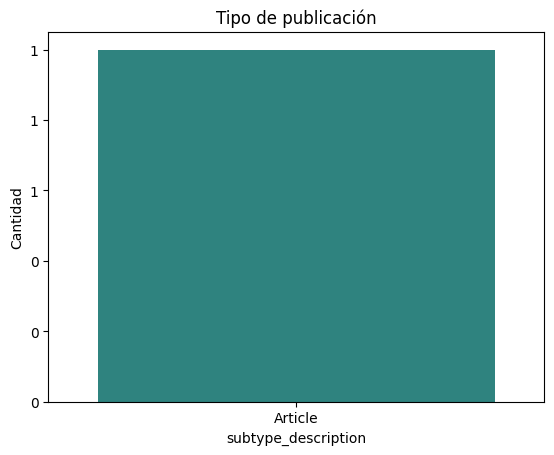

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada tipo de publicación y ordenar los datos por el índice
subtype_description = search_df['subtype_description'].value_counts()

# Crear el gráfico de barras con coloración por tipo de publicación
ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')

# Agregar etiquetas y título
plt.ylabel('Cantidad')
plt.title('Tipo de publicación')

# Formatear el eje y con un decimal
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Mostrar el gráfico
plt.show()

In [41]:
import pandas as pd

# Dividir la columna "cover_date" y crear la columna "year"
search_df['year'] = search_df['cover_date'].apply(lambda x: x.split('-')[0])

In [42]:
search_df.head(3)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text,year
0,85141769257,A hierarchical machine learning model based on...,Computers in Biology and Medicine,00104825,None,18790534,150,None,2022-11-01,10.1016/j.compbiomed.2022.106159,1,[{'name': 'Amirkabir University of Technology'...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...,2022


## Frecuencia de publicaciones por año

<ipython-input-43-ea52143cf8a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


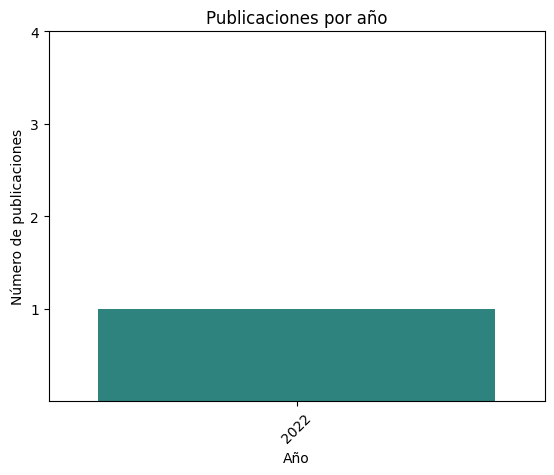

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada año y ordenar los datos por el índice
year_counts = search_df['year'].value_counts().sort_index()

# Crear el gráfico de barras con coloración por año
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de publicaciones')
plt.title('Publicaciones por año')
plt.xticks(rotation=45)

# Establecer los valores del eje y
ax.set_yticks([1, 2, 3, 4])

# Mostrar el gráfico
plt.show()

In [44]:
search_df.citation_count.unique()

array([1])

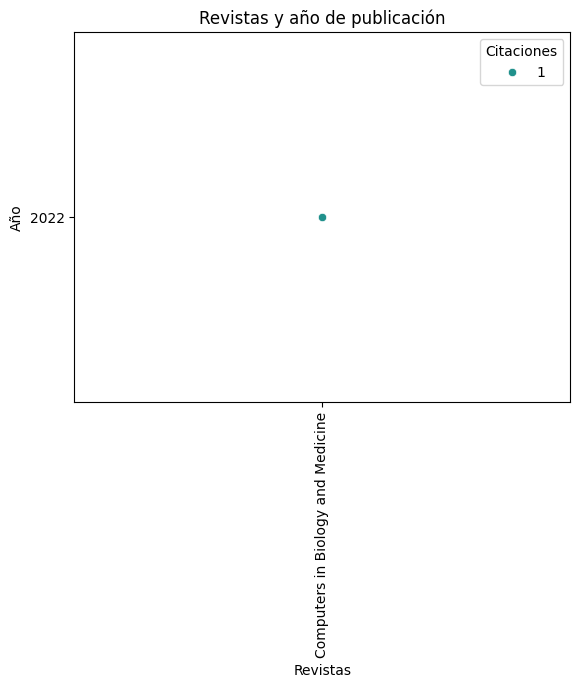

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df) #.sort_index(ascending=False)

# Crear el gráfico de dispersión con coloración por recurrencia
sns.scatterplot(data=df, x='publication_name', y='year', hue='citation_count', palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Revistas')
plt.ylabel('Año')
plt.title('Revistas y año de publicación')
plt.xticks(rotation=90)

# Cambiar el título de la leyenda
plt.legend(title='Citaciones')

# Mostrar el gráfico
plt.show()

### Análisis descriptivo

In [46]:
print("Cantidad de Filas y columnas:", search_df.shape)

Cantidad de Filas y columnas: (1, 17)


In [ ]:
print('Nombre columnas:',search_df.columns)

Nombre columnas: Index(['scopus_id', 'title', 'publication_name', 'issn', 'isbn', 'eissn',
       'volume', 'page_range', 'cover_date', 'doi', 'citation_count',
       'affiliation', 'aggregation_type', 'subtype_description', 'authors',
       'full_text', 'year'],
      dtype='object')


In [47]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scopus_id            1 non-null      object
 1   title                1 non-null      object
 2   publication_name     1 non-null      object
 3   issn                 1 non-null      object
 4   isbn                 0 non-null      object
 5   eissn                1 non-null      object
 6   volume               1 non-null      object
 7   page_range           0 non-null      object
 8   cover_date           1 non-null      object
 9   doi                  1 non-null      object
 10  citation_count       1 non-null      int64 
 11  affiliation          1 non-null      object
 12  aggregation_type     1 non-null      object
 13  subtype_description  1 non-null      object
 14  authors              1 non-null      object
 15  full_text            1 non-null      object
 16  year        

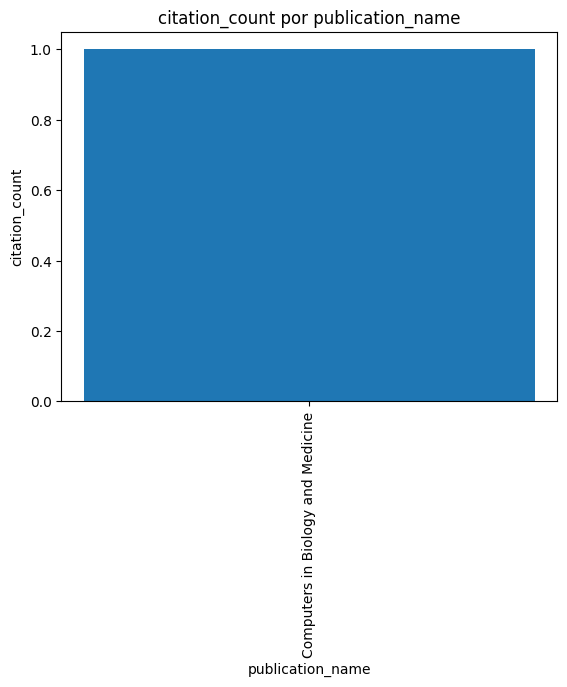

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df)

# Crear el gráfico de barras
plt.bar(df['publication_name'], df['citation_count'])

# Agregar etiquetas y título
plt.xlabel('publication_name')
plt.ylabel('citation_count')
plt.title('citation_count por publication_name')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()